In [1]:
### If Google Colab
!git config --global user.email "sjs.shamsi@gmail.com"
!git config --global user.name "SJShamsi"

from google.colab import drive
drive.mount('/content/drive')

Thesis_Files = '/content/drive/MyDrive/Thesis_Files/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import sys
# sys.path.insert(0, '/home/shoaib/Thesis/dmdt_Analysis/')
sys.path.insert(0, Thesis_Files + 'Thesis/dmdt_Analysis/')

from dmdt_functions import *

In [3]:
from pandas import read_parquet, DataFrame, concat
from numpy import linspace, load
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
# filtered_lightcurves_file = "/home/shoaib/PSChallenge/filtered_lightcurves.parquet"
filtered_lightcurves_file = Thesis_Files + "/filtered_lightcurves.parquet"

# dm_bins = linspace(-0.85, 0.8, ybins)
# dt_bins = linspace(-4, 3.5, xbins)
dm_bins = load(Thesis_Files + 'Thesis/dmdt_Analysis/Best_Bins/equivalent_bins_50x50_QSOs/QSO_dm_bins.npy')
dt_bins = load(Thesis_Files + 'Thesis/dmdt_Analysis/Best_Bins/equivalent_bins_50x50_QSOs/QSO_dt_bins.npy')

# These files do'nt exist yet, they are save paths for later in the notebook
# dmdt_by_name_band_50x50_equidistant_bins = '/home/shoaib/Thesis/dmdt_Analysis/Histograms/dmdt_by_Name_Band_50x50_equidistant_bins.pkl'
dmdt_by_Name_Band_50x50_equivalent_bins = Thesis_Files + 'Thesis/dmdt_Analysis/Histograms/dmdt_by_Name_Band_50x50_equivalent_bins.pkl'

In [5]:
### By experimentation we know that these are good bins

all_lightcurves = read_parquet(filtered_lightcurves_file)
# all_lightcurves = all_lightcurves.sample(frac=0.1)

In [6]:
### Looping now
grouped = all_lightcurves.groupby(['name', 'band'])
histogram_dict_list = []
num_total_groups = len(grouped)
count = 0

for (name, band), df in grouped:
    count += 1
    print(f'{count}\t/ {num_total_groups} objects in their bands done.')

    df = df.sort_values(by='mjd')
    n_good_det = len(df)
    if n_good_det < 20:
        continue

    mags, times = df['mag'].to_numpy(), df['mjd'].to_numpy()
    dmags, dtimes = get_differenciation(magnitudes=mags, times=times, log_dt=False)

    hist, _junk, _junk = get_2Dhistogram(dmagnitudes=dmags, dmagnitudes_bins=dm_bins, dtimes=dtimes, dtimes_bins=dt_bins, normalise=False, scale_factor=False)
    object_type = df['type'].iloc[0]

    histogram_dict = {'name': name, 'type': object_type, 'band': band, 'n_good_det': n_good_det, 'histogram': hist}
    histogram_dict_list.append(histogram_dict)

Streaming output truncated to the last 5000 lines.
59079	/ 64078 objects in their bands done.
59080	/ 64078 objects in their bands done.
59081	/ 64078 objects in their bands done.
59082	/ 64078 objects in their bands done.
59083	/ 64078 objects in their bands done.
59084	/ 64078 objects in their bands done.
59085	/ 64078 objects in their bands done.
59086	/ 64078 objects in their bands done.
59087	/ 64078 objects in their bands done.
59088	/ 64078 objects in their bands done.
59089	/ 64078 objects in their bands done.
59090	/ 64078 objects in their bands done.
59091	/ 64078 objects in their bands done.
59092	/ 64078 objects in their bands done.
59093	/ 64078 objects in their bands done.
59094	/ 64078 objects in their bands done.
59095	/ 64078 objects in their bands done.
59096	/ 64078 objects in their bands done.
59097	/ 64078 objects in their bands done.
59098	/ 64078 objects in their bands done.
59099	/ 64078 objects in their bands done.
59100	/ 64078 objects in their bands done.
591

In [7]:
hist_df = DataFrame(histogram_dict_list)
histogram_dict_list = []

In [8]:
grouped = hist_df.groupby('name')
rbg_band_position_dict = {'r': 0, 'g': 1}

for name, df in grouped:
    rgb_hist = np.zeros((50, 50, 3))
    n_good_det_list = [0, 0]
    hist_p_scale_list = [0, 0]

    for _, row in df.iterrows():
        hist = df.loc[df['band'] == row['band'], 'histogram'].values[0]
        hist_p_scale = hist.sum()
        rgb_hist[:, :, rbg_band_position_dict[row['band']]] = hist / hist_p_scale
        n_good_det = row['n_good_det']
        n_good_det_list[rbg_band_position_dict[row['band']]] = int(n_good_det)
        hist_p_scale_list[rbg_band_position_dict[row['band']]] = int(hist_p_scale)

    object_type = df['type'].iloc[0]
    object_bands = 'rg' if len(df) == 2 else df['band'].iloc[0]

    histogram_dict = {'name': name, 'type': object_type, 'band': object_bands, 'n_good_det': n_good_det_list, 'hist_p_scale': hist_p_scale_list, 'histogram': rgb_hist}
    histogram_dict_list.append(histogram_dict)

In [9]:
hist_df = DataFrame(histogram_dict_list)
hist_df = hist_df.sort_values(by=['type', 'name'], ignore_index=True)
del histogram_dict_list

In [10]:
hist_df

,name,type,band,n_good_det,hist_p_scale,histogram
0,1E 22044+468,A,rg,"[697, 439]","[235815, 96023]","[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."
1,2E 1853.7+4452,A,rg,"[591, 158]","[166322, 12399]","[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 8.06..."
2,2MASS J00265121-0159238,A,rg,"[257, 219]","[32816, 23829]","[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."
3,2MASS J00573811-1406173,A,rg,"[162, 147]","[13019, 10715]","[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."
4,2MASS J01283395-2358359,A,rg,"[81, 103]","[3233, 5243]","[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."
...,...,...,...,...,...,...
31798,J224028.85-010649.8,Seyfert_1,rg,"[149, 125]","[10995, 7746]","[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."
31799,J225452.22+004631.3,Seyfert_1,rg,"[154, 129]","[11750, 8250]","[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."
31800,J225737.49-082435.3,Seyfert_1,rg,"[122, 100]","[7380, 4937]","[[[0.0, 0.0, 0.0], [0.0, 0.0002025521571804739..."
31801,J230323.47-100235.4,Seyfert_1,rg,"[129, 107]","[8247, 5671]","[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."


In [11]:
hist_df.reset_index(drop=True).to_pickle(dmdt_by_Name_Band_50x50_equivalent_bins)

### Looking at what the histograms look like

In [12]:
hist_df = pd.read_pickle(dmdt_by_Name_Band_50x50_equivalent_bins)

In [13]:
hist_df

,name,type,band,n_good_det,hist_p_scale,histogram
0,1E 22044+468,A,rg,"[697, 439]","[235815, 96023]","[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."
1,2E 1853.7+4452,A,rg,"[591, 158]","[166322, 12399]","[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 8.06..."
2,2MASS J00265121-0159238,A,rg,"[257, 219]","[32816, 23829]","[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."
3,2MASS J00573811-1406173,A,rg,"[162, 147]","[13019, 10715]","[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."
4,2MASS J01283395-2358359,A,rg,"[81, 103]","[3233, 5243]","[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."
...,...,...,...,...,...,...
31798,J224028.85-010649.8,Seyfert_1,rg,"[149, 125]","[10995, 7746]","[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."
31799,J225452.22+004631.3,Seyfert_1,rg,"[154, 129]","[11750, 8250]","[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."
31800,J225737.49-082435.3,Seyfert_1,rg,"[122, 100]","[7380, 4937]","[[[0.0, 0.0, 0.0], [0.0, 0.0002025521571804739..."
31801,J230323.47-100235.4,Seyfert_1,rg,"[129, 107]","[8247, 5671]","[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."


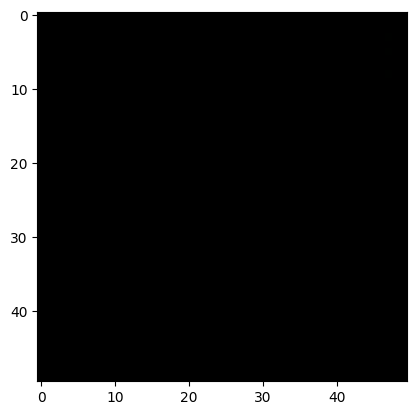

In [14]:
lc1 = hist_df['histogram'].iloc[1000]

plt.imshow(lc1)

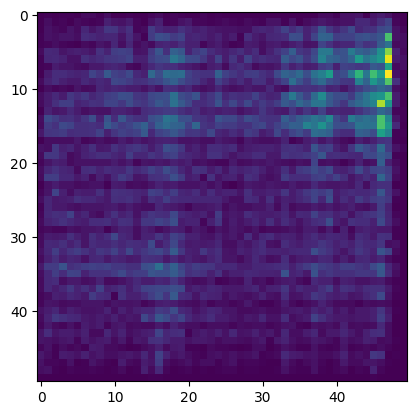

In [15]:
plt.imshow(lc1[:, :, 0])

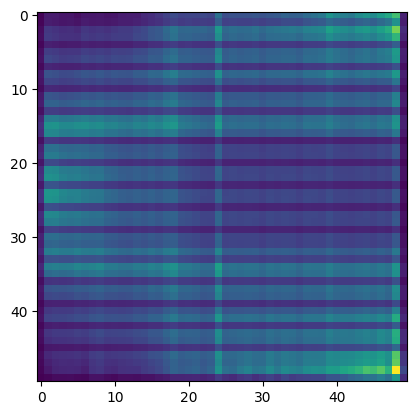

In [16]:
tot_Qs = hist_df[hist_df['type'] == 'QX']['histogram'].sum()
tot_Qs = (255 * tot_Qs) / tot_Qs.sum()
plt.imshow(tot_Qs[:, :, 1])

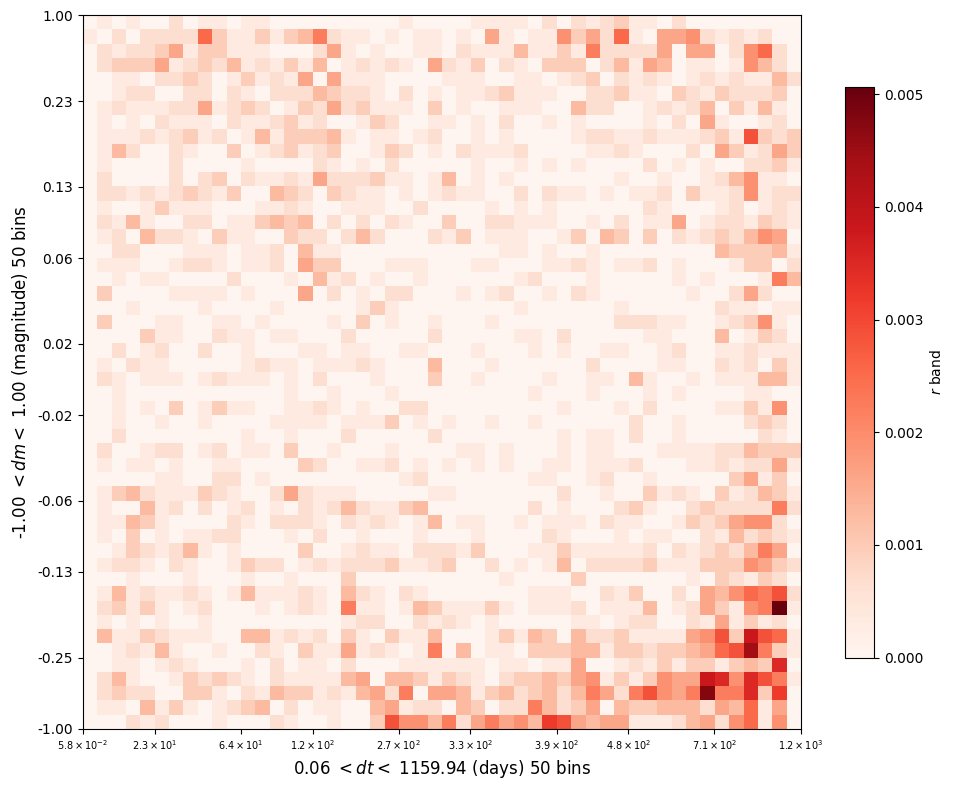

In [18]:
plot_dm_dt(hist_df['histogram'].iloc[45], 'r', dm_bins, dt_bins)

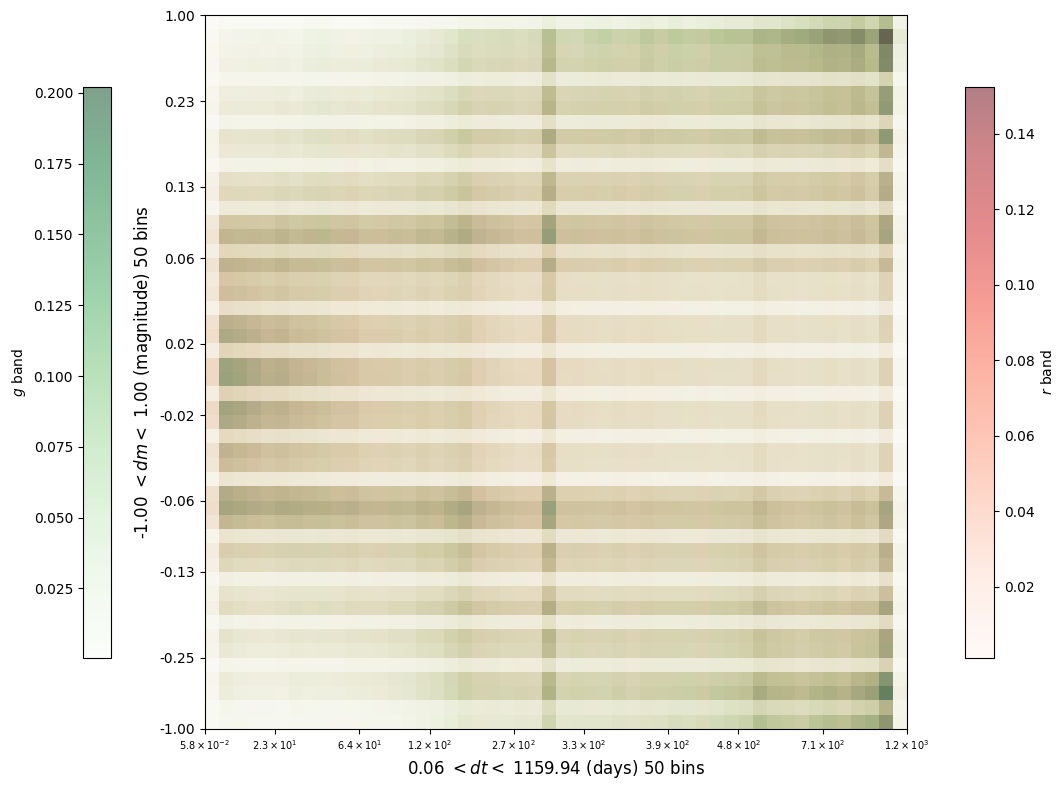

In [19]:
plot_dm_dt(tot_Qs, 'gr', dm_bins, dt_bins)

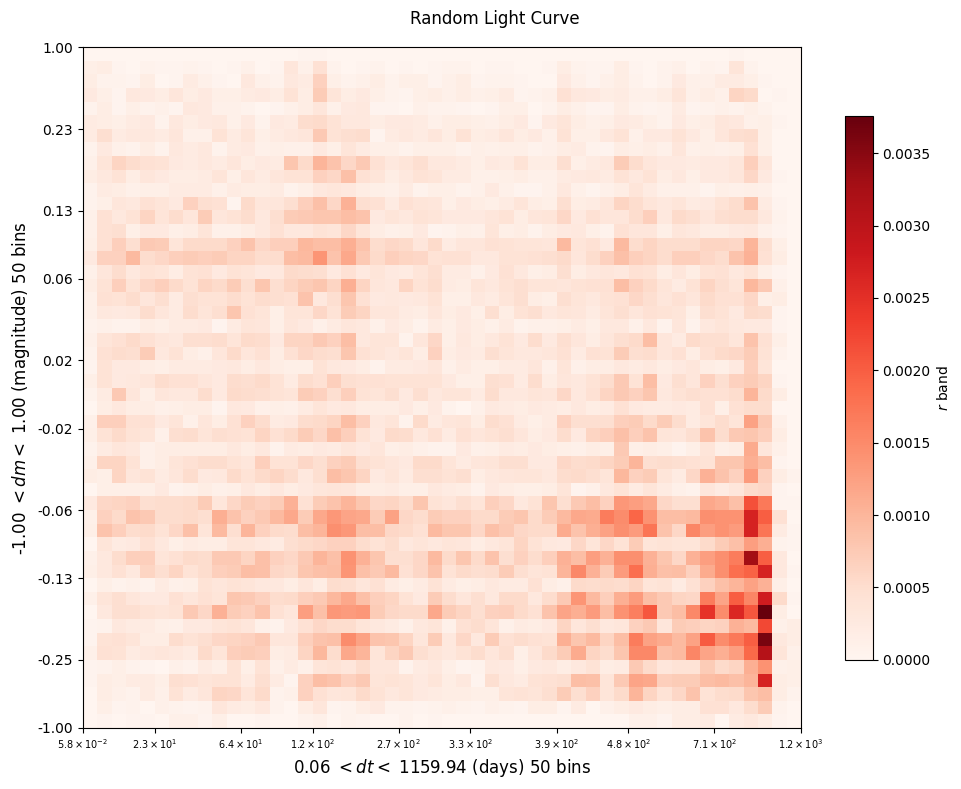

In [20]:
plot_dm_dt(lc1, band='r', dm_bins=dm_bins, dt_bins=dt_bins, title='Random Light Curve')

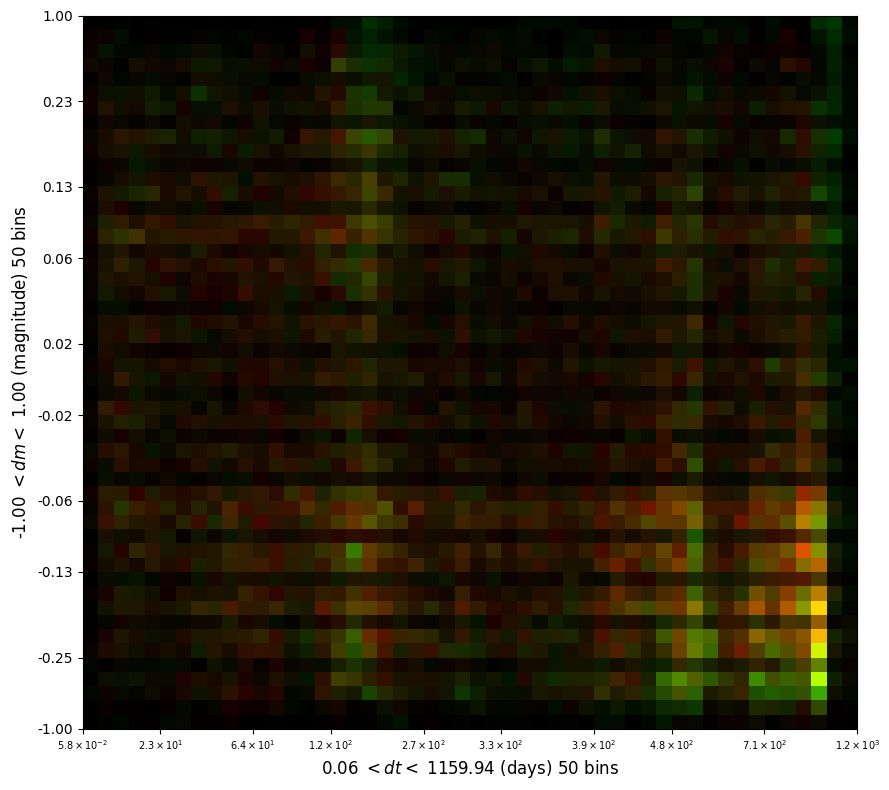

In [60]:
plot_dm_dt_rgb(lc1, dm_bins, dt_bins)

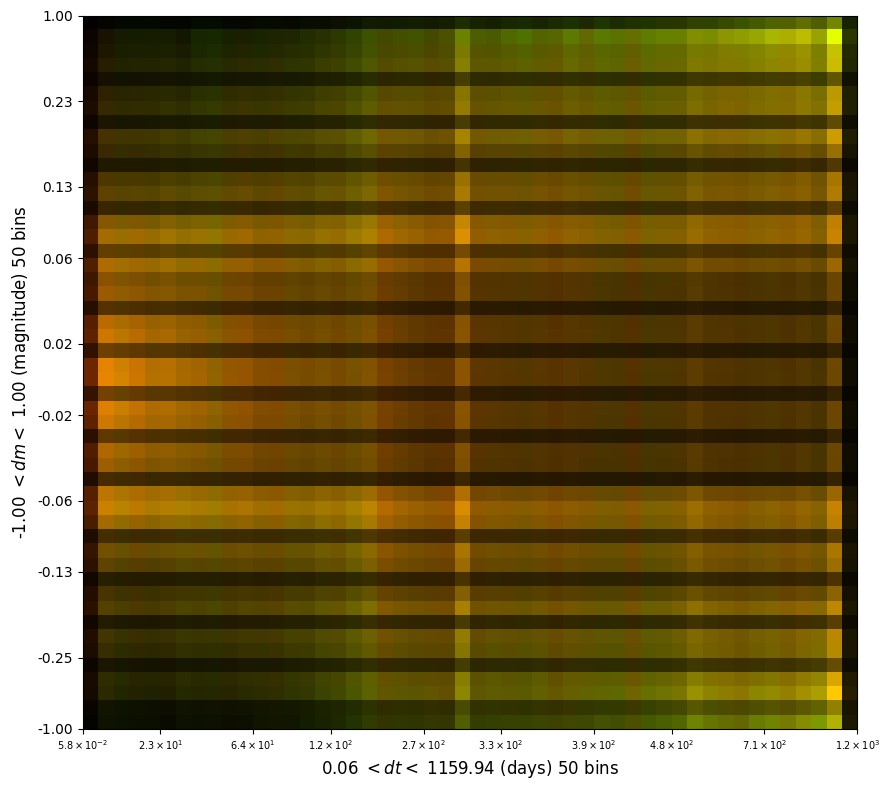

In [61]:
plot_dm_dt_rgb(tot_Qs, dm_bins, dt_bins)